In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

/home/haojie/anaconda3/lib/python3.6/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [3]:
train = pd.read_csv('data/train_clean_v1.csv')
test = pd.read_csv('data/tmp_clean_v1.csv')
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
0,1,0.107692,1,46,1,0.150395,0.737024,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0.369231,1,28,0,1.743285,0.512111,1,0,1,1,0,1,0,0,0,0,0,0
2,1,0.492308,1,46,0,-0.469641,0.747405,1,0,1,1,0,0,1,0,0,0,0,0
3,1,0.046154,1,46,1,-1.623761,0.529412,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0.353846,1,28,0,0.115793,0.159170,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304883,0,0.000000,1,7,0,-1.623761,0.878893,0,1,0,1,0,0,0,1,0,0,0,0
304884,0,0.061538,1,20,0,-1.623761,0.183391,0,1,0,1,0,1,0,0,0,0,0,0
304885,0,0.076923,1,36,1,-0.216672,0.055363,0,1,0,0,1,0,0,0,0,0,0,0
304886,1,0.030769,1,8,1,2.384081,0.449827,0,1,0,0,1,0,0,0,0,0,0,0


In [4]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
0,1,0.328125,1,6,0,0.336961,0.377163,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0.125000,1,28,1,0.811089,0.280277,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0.187500,1,8,0,0.360106,0.252595,0,0,0,1,0,0,1,0,0,0,0,0
3,1,0.250000,1,28,1,-0.031278,0.910035,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0.187500,1,15,0,0.440651,0.993080,0,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76216,0,0.406250,1,3,0,0.005754,0.477509,0,0,1,1,0,1,0,0,0,0,0,0
76217,0,0.265625,1,0,0,-1.619267,0.460208,0,0,0,0,0,0,0,0,0,0,0,0
76218,1,0.203125,1,49,1,0.170026,0.889273,0,1,0,0,1,0,0,0,0,0,0,0
76219,1,0.812500,1,28,0,0.212266,0.948097,0,0,1,1,0,0,1,0,0,0,0,0


In [7]:
train_target = train['Response']
train.drop(['Response'], axis=1, inplace=True)
test_target = test['Response']
test.drop(['Response'], axis=1, inplace=True)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
0,1,0.107692,1,46,1,0.150395,0.737024,1,0,0,1,0,0,0,0,0,0,0
1,0,0.369231,1,28,0,1.743285,0.512111,0,1,1,0,1,0,0,0,0,0,0
2,1,0.492308,1,46,0,-0.469641,0.747405,0,1,1,0,0,1,0,0,0,0,0
3,1,0.046154,1,46,1,-1.623761,0.529412,1,0,0,1,0,0,0,0,0,0,0
4,0,0.353846,1,28,0,0.115793,0.159170,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304883,0,0.000000,1,7,0,-1.623761,0.878893,1,0,1,0,0,0,1,0,0,0,0
304884,0,0.061538,1,20,0,-1.623761,0.183391,1,0,1,0,1,0,0,0,0,0,0
304885,0,0.076923,1,36,1,-0.216672,0.055363,1,0,0,1,0,0,0,0,0,0,0
304886,1,0.030769,1,8,1,2.384081,0.449827,1,0,0,1,0,0,0,0,0,0,0


In [8]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(train, train_target)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.0min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [9]:
model

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [10]:
y_pred=model.predict(test)
print (classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66696
           1       0.00      0.00      0.00      9525

    accuracy                           0.88     76221
   macro avg       0.44      0.50      0.47     76221
weighted avg       0.77      0.88      0.82     76221

/home/haojie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/haojie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/haojie/anaconda3/lib/

In [11]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_1_Year_down,Vehicle_Age_2_Years_up,Vehicle_Damage_Yes,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8
0,1,0.328125,1,6,0,0.336961,0.377163,0,0,1,0,0,1,0,0,0,0,0
1,0,0.125000,1,28,1,0.811089,0.280277,1,0,0,1,0,0,0,0,0,0,0
2,0,0.187500,1,8,0,0.360106,0.252595,0,0,1,0,0,1,0,0,0,0,0
3,1,0.250000,1,28,1,-0.031278,0.910035,0,0,0,0,0,0,0,0,1,0,0
4,0,0.187500,1,15,0,0.440651,0.993080,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76216,0,0.406250,1,3,0,0.005754,0.477509,0,1,1,0,1,0,0,0,0,0,0
76217,0,0.265625,1,0,0,-1.619267,0.460208,0,0,0,0,0,0,0,0,0,0,0
76218,1,0.203125,1,49,1,0.170026,0.889273,1,0,0,1,0,0,0,0,0,0,0
76219,1,0.812500,1,28,0,0.212266,0.948097,0,1,1,0,0,1,0,0,0,0,0


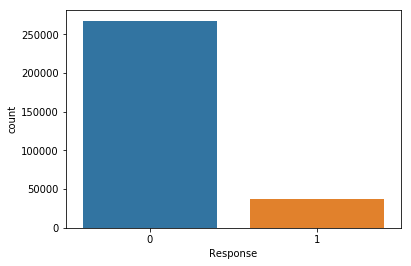

In [12]:
sns.countplot(train_target)


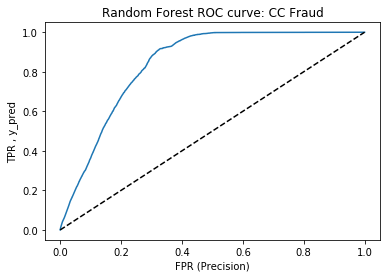

Area under curve (AUC):  0.8405120652424745


In [13]:
y_score = model.predict_proba(test)[:,1]
fpr, tpr, _ = roc_curve(test_target, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

data  Ensemble_learning.ipynb  examples.desktop  nohup.out  rf_model.sav


In [15]:
model.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=300)

In [20]:
pickle.dump(model, open('rf_model_clean_v1.sav', 'wb'))

In [21]:
from sklearn.svm import SVC

In [22]:
train_svc = train.copy()
train_svc_target = train_target.copy()

In [26]:
random_search_svc = {'C': 10. ** np.arange(-3, 8),
               'gamma' : 10. ** np.arange(-5, 4),}
clf_svc = SVC(probability=True)
svc_model = RandomizedSearchCV(estimator = clf_svc, param_distributions = random_search_svc, n_jobs\
                                         = -1, cv=5)

svc_model.fit(train_svc, train_svc_target)

ValueError: Invalid parameter gamma_range for estimator SVC(probability=True). Check the list of available parameters with `estimator.get_params().keys()`.

In [39]:
len(svc_model.support_vectors_)

2556

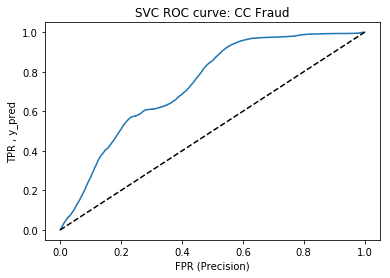

Area under curve (AUC):  0.7364179934057361


In [40]:
y_score2 = svc_model.predict_proba(test)[:,1]
fpr, tpr, _ = roc_curve(test_target, y_score2)

plt.title('SVC ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR , y_pred')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
pickle.dump(svc_model, open('svc_model_clean_v1.sav', 'wb'))

In [45]:
y_score2

array([0.11138788, 0.0985597 , 0.11353861, ..., 0.09600017, 0.16369665,
       0.09190764])

In [46]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [60]:
f, ax = plt.subplots(figsize=(15, 150))
sns.countplot(y='Policy_Sales_Channel', hue='Response', data=train).set_title('Response in different Policy Sales Channels')

ValueError: Could not interpret input 'Response'

In [57]:
psc_min = np.int(np.min(train['Policy_Sales_Channel']))
psc_max = np.int(np.max(train['Policy_Sales_Channel']))
print(psc_min)
print(psc_max)

1
163


In [64]:
psc_counts = [ np.sum(train['Policy_Sales_Channel'] == i) for i in range(psc_min, psc_max+1)]
for i, _ in enumerate(psc_counts):
    print(i+1, ':', psc_counts[i])

1 : 887
2 : 4
3 : 405
4 : 415
5 : 0
6 : 2
7 : 1268
8 : 1219
9 : 125
10 : 206
11 : 960
12 : 620
13 : 1494
14 : 486
15 : 737
16 : 407
17 : 14
18 : 133
19 : 181
20 : 24
21 : 108
22 : 263
23 : 328
24 : 600
25 : 1457
26 : 63622
27 : 3
28 : 2
29 : 671
30 : 1118
31 : 487
32 : 17
33 : 2
34 : 3
35 : 66
36 : 41
37 : 132
38 : 8
39 : 5
40 : 15
41 : 1
42 : 103
43 : 1
44 : 87
45 : 40
46 : 12
47 : 54
48 : 17
49 : 9
50 : 2
51 : 11
52 : 860
53 : 26
54 : 80
55 : 1020
56 : 54
57 : 5
58 : 9
59 : 94
60 : 408
61 : 475
62 : 5
63 : 17
64 : 68
65 : 50
66 : 13
67 : 4
68 : 4
69 : 5
70 : 4
71 : 4
72 : 0
73 : 11
74 : 2
75 : 2
76 : 4
77 : 0
78 : 20
79 : 3
80 : 10
81 : 12
82 : 4
83 : 4
84 : 1
85 : 0
86 : 36
87 : 4
88 : 26
89 : 13
90 : 21
91 : 131
92 : 20
93 : 26
94 : 38
95 : 7
96 : 14
97 : 10
98 : 18
99 : 5
100 : 6
101 : 7
102 : 2
103 : 65
104 : 4
105 : 2
106 : 38
107 : 41
108 : 30
109 : 129
110 : 8
111 : 51
112 : 1
113 : 80
114 : 16
115 : 3
116 : 130
117 : 4
118 : 15
119 : 88
120 : 581
121 : 54
122 : 7977
123 : 0
1

In [ ]:
random_search_svc = {
    
}